In [1]:
import pandas as pd
import numpy as np
import scipy
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
import seaborn as sns

In [2]:
uac9 = pd.read_csv("Unemployment and Crime.csv")

In [3]:
uac10 = uac9[['Vehicle_Theft', 'Unemploy_Georgia']]

In [4]:
uac10.head()

,Vehicle_Theft,Unemploy_Georgia
0,2418,0.091
1,1872,0.086
2,2129,0.082
3,2035,0.079
4,2105,0.082


## Assumptions

In [5]:
uac10.dropna(inplace = True)

<ipython-input-5-3a093342c43d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uac10.dropna(inplace = True)


/Users/lescrone/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Vehicle_Theft', ylabel='Density'>

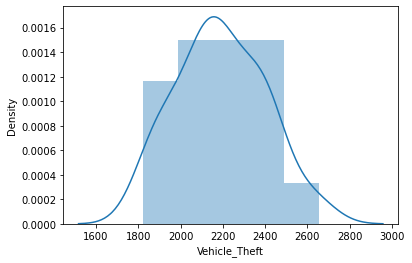

In [6]:
sns.distplot(uac10['Vehicle_Theft'])

In [7]:
uac10['Vehicle_TheftSQRT'] = np.sqrt(uac10['Vehicle_Theft'])

<ipython-input-7-e999a65c7bef>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uac10['Vehicle_TheftSQRT'] = np.sqrt(uac10['Vehicle_Theft'])


In [8]:
uac10.head()

,Vehicle_Theft,Unemploy_Georgia,Vehicle_TheftSQRT
0,2418,0.091,49.173163
1,1872,0.086,43.266615
2,2129,0.082,46.141088
3,2035,0.079,45.110974
4,2105,0.082,45.880279


/Users/lescrone/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Vehicle_TheftSQRT', ylabel='Density'>

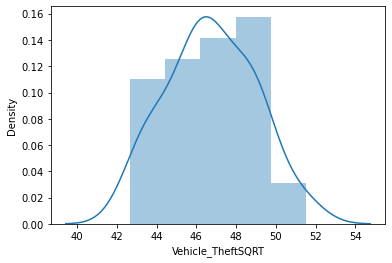

In [9]:
sns.distplot(uac10['Vehicle_TheftSQRT'])

In [10]:
scipy.stats.bartlett(uac10['Vehicle_TheftSQRT'], uac10['Unemploy_Georgia'])

BartlettResult(statistic=321.39433303578045, pvalue=7.197594055392667e-72)

In [11]:
scipy.stats.fligner(uac10['Vehicle_TheftSQRT'], uac10['Unemploy_Georgia'])

FlignerResult(statistic=42.869661272367054, pvalue=5.851106167362601e-11)

## Sample

In [12]:
uac10.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36 entries, 0 to 35
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Vehicle_Theft      36 non-null     int64  
 1   Unemploy_Georgia   36 non-null     float64
 2   Vehicle_TheftSQRT  36 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 1.1 KB


## Independence

In [13]:
uac10.Unemploy_Georgia.value_counts()

0.082    3
0.057    3
0.073    3
0.060    2
0.080    2
0.054    2
0.079    2
0.066    2
0.076    2
0.064    2
0.063    2
0.091    1
0.061    1
0.062    1
0.072    1
0.069    1
0.074    1
0.067    1
0.086    1
0.075    1
0.089    1
0.088    1
Name: Unemploy_Georgia, dtype: int64

In [14]:
postHoc = MultiComparison(uac10['Vehicle_TheftSQRT'], uac10['Unemploy_Georgia'])
postHocResults = postHoc.tukeyhsd()
print(postHocResults)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
 0.054  0.057   1.5293    0.9  -5.5019  8.5605  False
 0.054   0.06   3.3315    0.9  -4.3707 11.0338  False
 0.054  0.061   2.8512    0.9  -6.5821 12.2845  False
 0.054  0.062   2.8726    0.9  -6.5607 12.3058  False
 0.054  0.063   0.8478    0.9  -6.8544    8.55  False
 0.054  0.064   5.1663 0.4174  -2.5359 12.8686  False
 0.054  0.066   2.8775    0.9  -4.8247 10.5798  False
 0.054  0.067   2.9473    0.9   -6.486 12.3806  False
 0.054  0.069   5.5423 0.5978   -3.891 14.9756  False
 0.054  0.072    3.814    0.9  -5.6193 13.2473  False
 0.054  0.073   1.3278    0.9  -5.7034  8.3589  False
 0.054  0.074   4.8501 0.7579  -4.5832 14.2834  False
 0.054  0.075   -0.589    0.9 -10.0223  8.8443  False
 0.054  0.076   3.7262 0.8242   -3.976 11.4285  False
 0.054  0.079   1.6523    0.9  -6.0499  9.3546  False
 0.054   0.08   4.7962 0.521

In [15]:
uac10.groupby('Unemploy_Georgia').mean()

,Vehicle_Theft,Vehicle_TheftSQRT
Unemploy_Georgia,,
0.054,1929.500000,43.924876
0.057,2068.000000,45.454174
0.060,2237.000000,47.256413
0.061,2188.000000,46.776062
0.062,2190.000000,46.797436
0.063,2009.000000,44.772672
0.064,2410.000000,49.091192
0.066,2192.000000,46.802396
0.067,2197.000000,46.872167
